<a href="https://colab.research.google.com/github/wei-enwang/space-ham/blob/main/main_driver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import nltk
from nltk.corpus import words
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils import data
from preprocess import WholeData, BalancedData

import models
import utils

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/weinwang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
nltk.download('words')

device = "cuda" if torch.cuda.is_available() else "cpu"
assert device == "cuda"   # use gpu whenever you can!

seed = 32
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

[nltk_data] Downloading package words to /home/weinwang/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [16]:
plot_yes = True

# use one dataset for now
train_data_dir = "./data/enron1/"
test_data_dir = "./data/enron2/"
output_dir = "./output/"

# hyperparameters
batch_size = 64
hidden_size = 512
num_layer = 3
dropout = 0.5
learning_rate = 1e-4
epochs = 30
max_len = 80

In [4]:
vocab = set([str.lower() for str in words.words()])

# train_dataset = WholeData(train_data_dir, src_vocab=vocab, use_max_len=True, max_len=max_len)
# test_dataset = WholeData(test_data_dir, src_vocab=vocab, use_max_len=True, max_len=max_len)
# Balanced dataset
train_dataset = BalancedData(train_data_dir, src_vocab=vocab, use_max_len=True, max_len=max_len)
test_dataset = BalancedData(test_data_dir, src_vocab=vocab, use_max_len=True, max_len=max_len)

w2idx = train_dataset.src_v2id

embed = utils.load_pretrained_vectors(w2idx, "fastText/crawl-300d-2M.vec")
embed = torch.tensor(embed)

Number of ham emails: 1500, spam emails: 1500
Number of ham emails: 1496, spam emails: 1496
Loading pretrained vectors...
234378


0it [00:00, ?it/s]

There are 75835 / 234379 pretrained vectors found.


In [17]:
train_dataloader = data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, 
                                   num_workers=8, pin_memory=True)
test_dataloader = data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True, 
                                  num_workers=8, pin_memory=True, drop_last=True)


In [18]:
model = models.spam_lstm(hidden_size=hidden_size, pretrained_embedding=embed, dropout=dropout).to(device)
loss_fn = nn.BCEWithLogitsLoss().to(device)
opt = Adam(model.parameters(), lr=learning_rate)

Using pretrained vectors...


  3%|▎         | 1/30 [00:05<02:46,  5.74s/it]

Epoch 0
-------------------------------
Training loss: 0.692561, avg accuracy: 0.510353
Testing loss: 0.689884, avg accuracy: 0.536345


  7%|▋         | 2/30 [00:11<02:40,  5.74s/it]

Epoch 1
-------------------------------
Training loss: 0.401913, avg accuracy: 0.821951
Testing loss: 0.440129, avg accuracy: 0.857337


 10%|█         | 3/30 [00:17<02:34,  5.74s/it]

Epoch 2
-------------------------------
Training loss: 0.201651, avg accuracy: 0.937263
Testing loss: 0.358053, avg accuracy: 0.853261


 13%|█▎        | 4/30 [00:22<02:29,  5.74s/it]

Epoch 3
-------------------------------
Training loss: 0.136714, avg accuracy: 0.959299
Testing loss: 0.351929, avg accuracy: 0.883832


 17%|█▋        | 5/30 [00:28<02:23,  5.75s/it]

Epoch 4
-------------------------------
Training loss: 0.115431, avg accuracy: 0.967325
Testing loss: 0.312527, avg accuracy: 0.904552


 20%|██        | 6/30 [00:34<02:17,  5.75s/it]

Epoch 5
-------------------------------
Training loss: 0.086893, avg accuracy: 0.973214
Testing loss: 0.396577, avg accuracy: 0.876359


 23%|██▎       | 7/30 [00:40<02:12,  5.75s/it]

Epoch 6
-------------------------------
Training loss: 0.061233, avg accuracy: 0.980718
Testing loss: 0.264330, avg accuracy: 0.901155


 27%|██▋       | 8/30 [00:45<02:06,  5.75s/it]

Epoch 7
-------------------------------
Training loss: 0.045700, avg accuracy: 0.986702
Testing loss: 0.422037, avg accuracy: 0.893682


 30%|███       | 9/30 [00:51<02:00,  5.76s/it]

Epoch 8
-------------------------------
Training loss: 0.033236, avg accuracy: 0.990976
Testing loss: 0.355002, avg accuracy: 0.876019


 33%|███▎      | 10/30 [00:57<01:55,  5.77s/it]

Epoch 9
-------------------------------
Training loss: 0.032779, avg accuracy: 0.989362
Testing loss: 0.435823, avg accuracy: 0.881114


 37%|███▋      | 11/30 [01:03<01:49,  5.77s/it]

Epoch 10
-------------------------------
Training loss: 0.022781, avg accuracy: 0.994016
Testing loss: 0.351588, avg accuracy: 0.884171


 40%|████      | 12/30 [01:09<01:43,  5.77s/it]

Epoch 11
-------------------------------
Training loss: 0.017011, avg accuracy: 0.995631
Testing loss: 0.480874, avg accuracy: 0.865489


 43%|████▎     | 13/30 [01:14<01:38,  5.78s/it]

Epoch 12
-------------------------------
Training loss: 0.011162, avg accuracy: 0.997673
Testing loss: 0.675004, avg accuracy: 0.865489


 47%|████▋     | 14/30 [01:20<01:32,  5.78s/it]

Epoch 13
-------------------------------
Training loss: 0.025818, avg accuracy: 0.995678
Testing loss: 0.802857, avg accuracy: 0.868207


 50%|█████     | 15/30 [01:26<01:26,  5.78s/it]

Epoch 14
-------------------------------
Training loss: 0.041791, avg accuracy: 0.990359
Testing loss: 0.458880, avg accuracy: 0.858356


 53%|█████▎    | 16/30 [01:32<01:20,  5.79s/it]

Epoch 15
-------------------------------
Training loss: 0.026252, avg accuracy: 0.992591
Testing loss: 0.844918, avg accuracy: 0.839674


 57%|█████▋    | 17/30 [01:38<01:15,  5.78s/it]

Epoch 16
-------------------------------
Training loss: 0.053209, avg accuracy: 0.989362
Testing loss: 0.684097, avg accuracy: 0.854620


 60%|██████    | 18/30 [01:43<01:09,  5.79s/it]

Epoch 17
-------------------------------
Training loss: 0.015795, avg accuracy: 0.996343
Testing loss: 0.508957, avg accuracy: 0.894701


 63%|██████▎   | 19/30 [01:49<01:03,  5.79s/it]

Epoch 18
-------------------------------
Training loss: 0.007753, avg accuracy: 0.998005
Testing loss: 0.793904, avg accuracy: 0.860734


 67%|██████▋   | 20/30 [01:55<00:57,  5.79s/it]

Epoch 19
-------------------------------
Training loss: 0.015267, avg accuracy: 0.995678
Testing loss: 0.814082, avg accuracy: 0.869226


 70%|███████   | 21/30 [02:01<00:52,  5.79s/it]

Epoch 20
-------------------------------
Training loss: 0.007498, avg accuracy: 0.999003
Testing loss: 0.786308, avg accuracy: 0.869565


 73%|███████▎  | 22/30 [02:06<00:46,  5.79s/it]

Epoch 21
-------------------------------
Training loss: 0.010767, avg accuracy: 0.998338
Testing loss: 0.998982, avg accuracy: 0.849185


 77%|███████▋  | 23/30 [02:12<00:40,  5.80s/it]

Epoch 22
-------------------------------
Training loss: 0.016035, avg accuracy: 0.996011
Testing loss: 0.632654, avg accuracy: 0.876698


 80%|████████  | 24/30 [02:18<00:34,  5.80s/it]

Epoch 23
-------------------------------
Training loss: 0.018808, avg accuracy: 0.995678
Testing loss: 0.467136, avg accuracy: 0.882473


 83%|████████▎ | 25/30 [02:24<00:28,  5.79s/it]

Epoch 24
-------------------------------
Training loss: 0.004486, avg accuracy: 0.999335
Testing loss: 0.787431, avg accuracy: 0.874660


 87%|████████▋ | 26/30 [02:30<00:23,  5.79s/it]

Epoch 25
-------------------------------
Training loss: 0.003108, avg accuracy: 0.999668
Testing loss: 0.814243, avg accuracy: 0.875340


 90%|█████████ | 27/30 [02:35<00:17,  5.79s/it]

Epoch 26
-------------------------------
Training loss: 0.002984, avg accuracy: 0.999668
Testing loss: 0.825054, avg accuracy: 0.876698


 93%|█████████▎| 28/30 [02:41<00:11,  5.79s/it]

Epoch 27
-------------------------------
Training loss: 0.002891, avg accuracy: 0.999668
Testing loss: 0.852341, avg accuracy: 0.873981


 97%|█████████▋| 29/30 [02:47<00:05,  5.80s/it]

Epoch 28
-------------------------------
Training loss: 0.002890, avg accuracy: 0.999668
Testing loss: 0.847403, avg accuracy: 0.878057


100%|██████████| 30/30 [02:53<00:00,  5.78s/it]

Epoch 29
-------------------------------
Training loss: 0.002870, avg accuracy: 0.999668
Testing loss: 0.867772, avg accuracy: 0.876698


Final testing loss: 0.888697, testing accuracy: 0.873641
Ham Precision: 0.921659, Recall: 0.816327, F1 score: 0.865801.
Ham Precision: 0.835566, Recall: 0.930801, F1 score: 0.880616.


(0.002869866807583442, 0.8886965435484181)

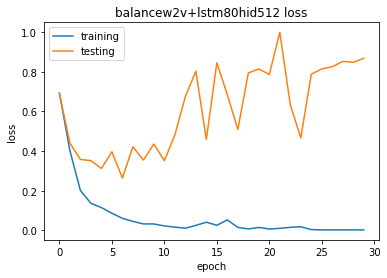

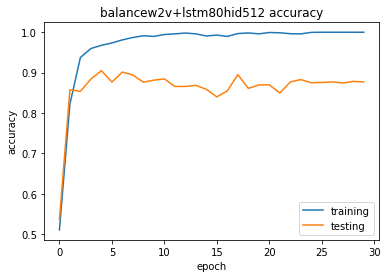

In [19]:
utils.train_test_scheme(train_dataloader, test_dataloader, model, loss_fn, opt, 
                        task_name="balancew2v+lstm80hid512", epochs=epochs, 
                        vis=plot_yes, print_every=1, img_dir=output_dir)



In [8]:
#torch.save(model.state_dict(), output_dir+"balancew2v_lstm100batch32.pt")

In [9]:
#test_message = "Subject: Look, I understand everything, but this is a frank bust... Look here and tell me your opinion"

In [10]:
# from preprocess import clean_string
# context = clean_string(test_message)
# sent_id = [0 for _ in range(max_len)]
# for i, w in enumerate(context):
#     if i >= max_len:
#         break
#     if w not in train_dataset.vocab:
#         w = '<unk>'
#     sent_id[i] = train_dataset.src_v2id[w]
# sent_id = torch.unsqueeze(torch.tensor(sent_id),dim=0).to(device)

In [11]:
# model.eval()
# print(f"Email message: \"{test_message}\"")
# with torch.no_grad():
#     pred = nn.Sigmoid()(model(sent_id))
#     pred = torch.squeeze(pred)

#     if pred > 0.5:
#         print("This is a ham email message.")
#     else:
#         print("This is a spam email message.")

# print(f"The probability of this email being a spam is {(1-pred)*100:.1f}%.")